## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
#import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
df_full = pd.read_csv("data\kc_house_data.csv")
df_CPI =pd.read_csv('./data/CPIHOSNS.csv')

In [4]:
df = df_full[['id', 'sqft_lot', 'sqft_living',
                    'grade', 'condition', 'sqft_basement'
                    , 'bathrooms', 'bedrooms',
                    'date', 'waterfront', 'view', 'price', 'floors', 'zipcode']]

df_zip = df_full[['zipcode', 'price']]
zipvalues =df_zip.groupby(['zipcode']).mean()
zipvalues = pd.DataFrame(zipvalues)

def lot_fix(x):
    if x < np.exp(7.5):
        return 1
    elif x < np.exp(10.25):
        return 2
    elif x < np.exp(12):
        return 3
    else:
        return 4

df['lot_type'] = df['sqft_lot'].apply(lot_fix)

df_zt = df_full[['id', 'zipcode']]
zip_mult = df_zt.zipcode.replace(df_zip.set_index('zipcode')['price'])

df = pd.concat([df, zip_mult], axis=1)
df = df.rename(columns={'zipcode': 'zip_value'})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_living    21597 non-null  int64  
 3   grade          21597 non-null  int64  
 4   condition      21597 non-null  int64  
 5   sqft_basement  21597 non-null  object 
 6   bathrooms      21597 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   date           21597 non-null  object 
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  price          21597 non-null  float64
 12  floors         21597 non-null  float64
 13  zipcode        21597 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.3+ MB


df['lat'] = df['lat'].apply(lambda x: "{:.1f}".format(x)).astype('float64')
df['long'] =df['long'].apply(lambda x: "{:.1f}".format(x)).astype('float64')



locations = locations.pivot_table(index='lat', 
                   columns='long', 
                   values='price', 
                   aggfunc='mean')
ax = sns.heatmap(locations)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   sqft_lot       21597 non-null  int64  
 2   sqft_living    21597 non-null  int64  
 3   grade          21597 non-null  int64  
 4   condition      21597 non-null  int64  
 5   sqft_basement  21597 non-null  object 
 6   bathrooms      21597 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   date           21597 non-null  object 
 9   waterfront     19221 non-null  float64
 10  view           21534 non-null  float64
 11  price          21597 non-null  float64
 12  floors         21597 non-null  float64
 13  zipcode        21597 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.3+ MB


In [7]:
df['view'] = df['view'].fillna(0)
df['waterfront'] = df['waterfront'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].replace(to_replace='?', value= 0)

<ipython-input-7-f4b72d66a059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = df['view'].fillna(0)
<ipython-input-7-f4b72d66a059>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waterfront'] = df['waterfront'].fillna(0)
<ipython-input-7-f4b72d66a059>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

prestige = sqft_living/sqft_living15
prestige2 =        sqft_lot/sqft_lot15
           

df_loc = df_full[['lat', 'long', 'price']]

fig = px.scatter_mapbox(df_loc, lat='lat', lon='long',          zoom=7, height = 600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()

### row 3910

In [8]:
df[df.view != 0] = 1

<ipython-input-8-932d5d86620b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.view != 0] = 1
C:\Users\saifw\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

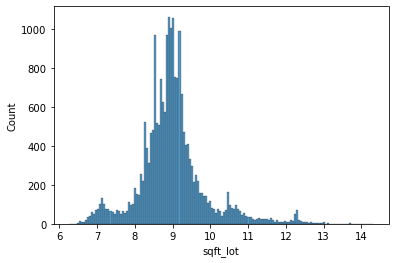

In [10]:
sns.histplot(np.log(df_full['sqft_lot']))

0-7.5
7.5 - 10.25
10.25 - 12
12+

In [11]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [12]:

df['view'].value_counts(normalize=True)

0.0    0.902209
1.0    0.097791
Name: view, dtype: float64

In [13]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [14]:

df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date'] = df['date'].apply(lambda x: x.strftime('%Y-%m'))

ValueError: time data '1' does not match format '%m/%d/%Y' (match)

In [14]:
max(df['date'])

'2015-05'

In [15]:
df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

# Make Multiplier
df_CPI['Multiplier'] = df_CPI['CPIHOSNS'].iloc[-1] / df_CPI['CPIHOSNS']

In [16]:
df = pd.merge(df, df_CPI,left_on='date', right_on='DATE', how='left')

In [17]:
df['price_adj'] = df['price'] * df['Multiplier']

In [18]:
df.grade.value_counts(normalize=True)

7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

In [19]:
df.grade = df.grade.apply(lambda x: x-3)
df.grade

0        4
1        4
2        3
3        4
4        5
        ..
21592    5
21593    5
21594    4
21595    5
21596    4
Name: grade, Length: 21597, dtype: int64

In [20]:
def gr_fix(x):
    if x < 5:
        return 1
    elif x < 8:
        return 2
    elif x <10:
        return 3
    else:
        return 4

In [21]:
df['grade'] = df['grade'].apply(gr_fix)

In [22]:
df_clean = df
realprice = pd.DataFrame.copy(df['price'])

In [23]:
df[['sqft_lot', 'sqft_living', 'price_adj']] = np.log(df[['sqft_lot', 'sqft_living', 'price_adj']])

#df['sqft_lot'] = np.log(df['sqft_lot'])
#df['sqft_living'] = np.log(df['sqft_living'])
#df['price'] = np.log(df['price'])

In [24]:
df

,id,sqft_lot,sqft_living,grade,condition,sqft_basement,bathrooms,bedrooms,date,waterfront,view,price,floors,zipcode,DATE,CPIHOSNS,Multiplier,price_adj
0,7129300520,8.639411,7.073270,1,3,0.0,1.00,3,2014-10,0.0,0.0,221900.0,1.0,98178,2014-10,234.434,1.025551,12.335212
1,6414100192,8.887653,7.851661,1,3,400.0,2.25,3,2014-12,0.0,0.0,538000.0,2.0,98125,2014-12,234.658,1.024572,13.219889
2,5631500400,9.210340,6.646391,1,3,0.0,1.00,2,2015-02,0.0,0.0,180000.0,1.0,98028,2015-02,236.016,1.018677,12.119217
3,2487200875,8.517193,7.580700,1,5,910.0,3.00,4,2014-12,0.0,0.0,604000.0,1.0,98136,2014-12,234.658,1.024572,13.335604
4,1954400510,8.997147,7.426549,2,3,0.0,2.00,3,2015-02,0.0,0.0,510000.0,1.0,98074,2015-02,236.016,1.018677,13.160670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,7.030857,7.333023,2,3,0.0,2.50,3,2014-05,0.0,0.0,360000.0,3.0,98103,2014-05,232.744,1.032998,12.826324
21593,6600060120,8.667852,7.745003,2,3,0.0,2.50,4,2015-02,0.0,0.0,400000.0,2.0,98146,2015-02,236.016,1.018677,12.917724
21594,1523300141,7.207860,6.927558,1,3,0.0,0.75,2,2014-06,0.0,0.0,402101.0,2.0,98144,2014-06,233.894,1.027919,12.931995
21595,291310100,7.778211,7.377759,2,3,0.0,2.50,3,2015-01,0.0,0.0,400000.0,2.0,98027,2015-01,235.485,1.020974,12.919977


In [25]:
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode', drop_first=True)

grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
cond_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)
# = pd.get_dummies(df['lot_type'], prefix ='lot_size' , drop_first= True)   
view_dummies =pd.get_dummies(df['view'], prefix ='view' , drop_first= True)
df = df.drop([ 'grade', 'condition', 'view', 'zipcode'], axis=1)



df = pd.concat([df, grade_dummies, cond_dummies, zip_dummies], axis=1)


In [26]:
df = df.drop(['id', 'date', 'price', 'CPIHOSNS', 'Multiplier'], axis= 1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_lot       21597 non-null  float64
 1   sqft_living    21597 non-null  float64
 2   sqft_basement  21597 non-null  object 
 3   bathrooms      21597 non-null  float64
 4   bedrooms       21597 non-null  int64  
 5   waterfront     21597 non-null  float64
 6   floors         21597 non-null  float64
 7   DATE           21597 non-null  object 
 8   price_adj      21597 non-null  float64
 9   grade_2        21597 non-null  uint8  
 10  grade_3        21597 non-null  uint8  
 11  grade_4        21597 non-null  uint8  
 12  cond_2         21597 non-null  uint8  
 13  cond_3         21597 non-null  uint8  
 14  cond_4         21597 non-null  uint8  
 15  cond_5         21597 non-null  uint8  
 16  zipcode_98002  21597 non-null  uint8  
 17  zipcode_98003  21597 non-null  uint8  
 18  zipcod

In [28]:
price_log = df.price_adj
price_log = pd.DataFrame(price_log)

In [29]:
price_log

,price_adj
0,12.335212
1,13.219889
2,12.119217
3,13.335604
4,13.160670
...,...
21592,12.826324
21593,12.917724
21594,12.931995
21595,12.919977


In [30]:
scaler = StandardScaler()
scalerp = StandardScaler()
df[['sqft_living', 'sqft_lot', 'sqft_basement', 'bedrooms', 'bathrooms']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'sqft_basement', 'bedrooms', 'bathrooms']])

df['price_adj'] = scalerp.fit_transform(price_log)


In [31]:
df.waterfront = df.waterfront.fillna(0)

In [32]:
df = df.drop('DATE', 1)

In [33]:
X = df.drop('price_adj', 1)
y =df['price_adj']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17277 entries, 6243 to 15795
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_lot       17277 non-null  float64
 1   sqft_living    17277 non-null  float64
 2   sqft_basement  17277 non-null  float64
 3   bathrooms      17277 non-null  float64
 4   bedrooms       17277 non-null  float64
 5   waterfront     17277 non-null  float64
 6   floors         17277 non-null  float64
 7   grade_2        17277 non-null  uint8  
 8   grade_3        17277 non-null  uint8  
 9   grade_4        17277 non-null  uint8  
 10  cond_2         17277 non-null  uint8  
 11  cond_3         17277 non-null  uint8  
 12  cond_4         17277 non-null  uint8  
 13  cond_5         17277 non-null  uint8  
 14  zipcode_98002  17277 non-null  uint8  
 15  zipcode_98003  17277 non-null  uint8  
 16  zipcode_98004  17277 non-null  uint8  
 17  zipcode_98005  17277 non-null  uint8  
 18  zip

In [36]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train , predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_adj   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1311.
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:51:45   Log-Likelihood:                -7344.4
No. Observations:               17277   AIC:                         1.486e+04
Df Residuals:                   17193   BIC:                         1.551e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6572      0.089    -18.530      0.000      -1.832      -1.482
sqft_lot          0.1313      0.004     31.839      0.000       0.123       0.139
sqft_living       0.4899      0.006     77.128      0.000       0.477       0.502
sqft_basement    -0.0634      0.004    -15.884      0.000      -0.071      -0.056
bathrooms         0.0685      0.005     13.752      0.000       0.059       0.078
bedrooms         -0.0521      0.004    -13.286      0.000      -0.060      -0.044
waterfront        1.3654      0.035     38.622      0.000       1.296       1.435
floors           -0.0302      0.008     -3.673      0.000      -0.046      -0.014
grade_2           0.2324      0.008     29.486      0.000       0.217       0.248
grade_3           0.7478      0.023     32.692      0.000       0.703       0.793
grade_4           1.4997      0.114     13.109      0.000       1.275       1.724
cond_2            0.3175      0.091      3.482      0.000       0.139       0.496
cond_3            0.5649      0.086      6.591      0.000       0.397       0.733
cond_4            0.6214      0.086      7.245      0.000       0.453       0.790
cond_5            0.7358      0.086      8.535      0.000       0.567       0.905
zipcode_98002    -0.0156      0.038     -0.415      0.678      -0.089       0.058
zipcode_98003     0.0899      0.033      2.693      0.007       0.024       0.155
zipcode_98004     2.2482      0.033     69.155      0.000       2.185       2.312
zipcode_98005     1.4579      0.039     37.397      0.000       1.381       1.534
zipcode_98006     1.3762      0.029     46.711      0.000       1.318       1.434
zipcode_98007     1.3256      0.041     32.007      0.000       1.244       1.407
zipcode_98008     1.3152      0.033     39.721      0.000       1.250       1.380
zipcode_98010     0.4253      0.046      9.191      0.000       0.335       0.516
zipcode_98011     0.8895      0.037     23.792      0.000       0.816       0.963
zipcode_98014     0.4960      0.042     11.675      0.000       0.413       0.579
zipcode_98019     0.5523      0.038     14.689      0.000       0.479       0.626
zipcode_98022     0.1283      0.035      3.641      0.000       0.059       0.197
zipcode_98023    -0.0224      0.029     -0.781      0.435      -0.079       0.034
zipcode_98024     0.7574      0.050     15.160      0.000       0.659       0.855
zipcode_98027     0.9995      0.030     33.389      0.000       0.941       1.058
zipcode_98028     0.8105      0.033     24.391      0.000       0.745       0.876
zipcode_98029     1.2141      0.032     37.431      0.000       1.151       1.278
zipcode_98030     0.1137      0.034      3.303      0.001       0.046       0.181
zipcode_98031     0.1607      0.033      4.838      0.000       0.096       0.226
zipcode_98032    -0.0205      0.043     -0.475   

In [37]:
X_train

,sqft_lot,sqft_living,sqft_basement,bathrooms,bedrooms,waterfront,floors,grade_2,grade_3,grade_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6243,-0.556551,-0.656140,-0.649637,-0.150626,0.676687,0.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8986,0.228514,-0.672568,0.009739,-0.475738,-0.402903,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,-0.523926,1.166643,-0.649637,0.824709,0.676687,0.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10155,-0.157592,0.187988,1.260280,0.499597,0.676687,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,-0.749346,0.644360,1.214806,-0.150626,-0.402903,0.0,1.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.359391,0.374926,-0.649637,0.499597,-0.402903,0.0,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21575,-0.813094,0.886136,-0.649637,0.824709,0.676687,0.0,2.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5390,0.127681,-0.513218,-0.649637,-0.800849,0.676687,0.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0.693970,-3.796843,-0.649637,-1.776184,-2.562083,0.0,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_1= LinearRegression()
model_1.fit(X_train, y_train)

# make predictions
y_hat = model_1.predict(X_train)



In [39]:
features = X_train
label = y_train

In [40]:


scores = cross_val_score(
            model_1, 
            features,
            label,
            cv=8,
            scoring="neg_mean_squared_error")



rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

0.3722707445210921

In [41]:
scores

array([-0.13485067, -0.142768  , -0.14379805, -0.13739049, -0.13613892,
       -0.14476106, -0.13575281, -0.13347224])

In [42]:
display(model_1)


LinearRegression()

In [43]:
display(rmse_scores)
display(rmse_scores.mean())
display(rmse_scores.std())

array([0.36722019, 0.37784653, 0.37920714, 0.37066223, 0.36897008,
       0.38047478, 0.36844648, 0.36533853])

0.3722707445210921

0.005569778402573466

In [44]:


scores2 = cross_val_score(
            model_1, 
            X_test,
            y_test,
            cv=8,
            scoring="neg_mean_squared_error"
)

rmse_scores2 = np.sqrt(-scores2)

In [45]:
scores2

array([-0.14196541, -0.15396287, -0.15247209, -0.14926604, -0.13643767,
       -0.11472168, -0.12690122, -0.1442561 ])

In [46]:
display(rmse_scores2)
display(rmse_scores2.mean())
display(rmse_scores2.std())

array([0.37678297, 0.39238103, 0.39047674, 0.38634963, 0.3693747 ,
       0.33870589, 0.35623198, 0.37981061])

0.37376419450060866

0.01726880365396724

In [47]:
df = pd.DataFrame(df)

In [48]:
df

,sqft_lot,sqft_living,sqft_basement,bathrooms,bedrooms,waterfront,floors,price_adj,grade_2,grade_3,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.388439,-1.125582,-0.649637,-1.451073,-0.402903,0.0,1.0,-1.398128,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.113243,0.709463,0.259847,0.174486,-0.402903,0.0,2.0,0.282056,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.244481,-2.131943,-0.649637,-1.451073,-1.482493,0.0,1.0,-1.808348,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.523926,0.070676,1.419440,1.149821,0.676687,0.0,1.0,0.501824,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.008140,-0.292732,-0.649637,-0.150626,-0.402903,0.0,1.0,0.169588,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-2.171645,-0.513218,-0.649637,0.499597,-0.402903,0.0,3.0,-0.465405,1,0,...,0,0,0,0,0,0,0,0,0,0
21593,-0.356909,0.458017,-0.649637,0.499597,0.676687,0.0,2.0,-0.291817,1,0,...,1,0,0,0,0,0,0,0,0,0
21594,-1.975424,-1.469095,-0.649637,-1.776184,-1.482493,0.0,2.0,-0.264715,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,-1.343145,-0.407754,-0.649637,0.499597,-0.402903,0.0,2.0,-0.287539,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_hat = model_1.predict(df.drop('price_adj', 1))
y_hat

array([-1.39768564,  0.36048939, -1.30534694, ..., -0.64948661,
       -0.2006321 , -0.68251896])

In [50]:
y_hat = scalerp.inverse_transform(y_hat)

y_hat = np.exp(y_hat)
y_hat

array([227622.78275294, 574460.65722615, 238963.16417569, ...,
       337526.23954663, 427511.48254156, 331706.50046546])

In [51]:
resids = y_hat - realprice

In [52]:
print(y_hat[3910])
print(realprice[3910])

7250702.392756268
7060000.0


In [53]:
resids.describe()

count    2.159700e+04
mean     4.988231e+02
std      1.417307e+05
min     -2.226832e+06
25%     -3.751443e+04
50%      8.455779e+03
75%      5.685267e+04
max      2.540232e+06
Name: price, dtype: float64

In [54]:
(abs(resids).mean())/(realprice.mean())

0.15014046457319213

In [55]:
realprice.mean()

540296.5735055795

In [56]:
resids = pd.DataFrame(resids)

In [57]:
resids

,price
0,5722.782753
1,36460.657226
2,58963.164176
3,3789.831516
4,5578.872810
...,...
21592,203217.795855
21593,53767.458295
21594,-64574.760453
21595,27511.482542


In [58]:
resids.min()

price   -2.226832e+06
dtype: float64

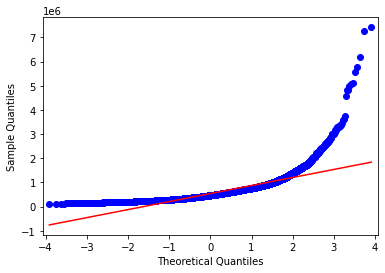

In [59]:
import scipy.stats as stats
fig = sm.graphics.qqplot(y_hat, line='s')

<AxesSubplot:xlabel='price', ylabel='Count'>

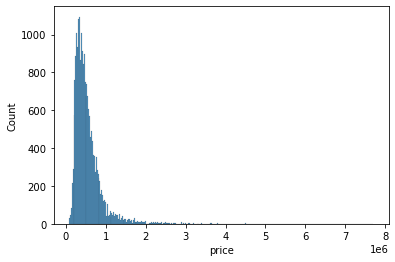

In [60]:
sns.histplot(df_full['price'])

In [61]:
df_full.duplicated(subset=None, keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool